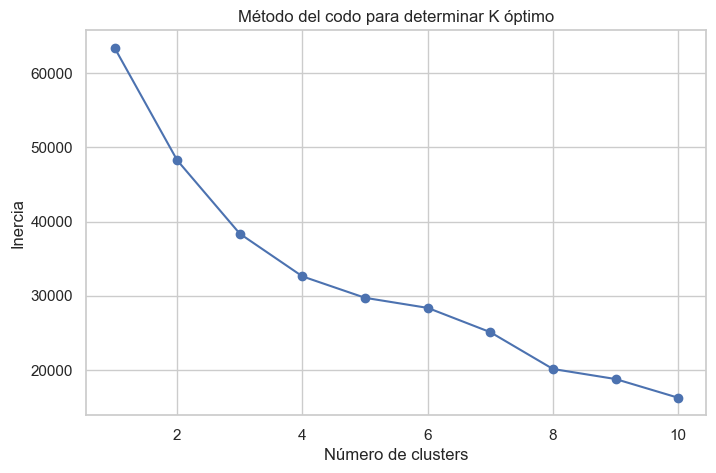

Centros de los clusters:
   num_reactions  num_comments  num_shares    num_likes   num_loves  \
0     111.127579     80.400349   17.811012   103.781339    6.355919   
1     579.518414   2861.226629  409.413598   450.339943  113.739377   
2    1830.249322     61.560976   11.558266  1824.479675    3.094851   
3    1618.000000   1626.846154  812.538462  1146.961538  322.692308   

     num_wows  num_hahas  num_sads  num_angrys  
0    0.534116   0.292447  0.120597    0.040781  
1    4.492918   6.977337  2.566572    1.390935  
2    2.439024   0.197832  0.032520    0.005420  
3  124.538462  20.423077  1.538462    1.846154  


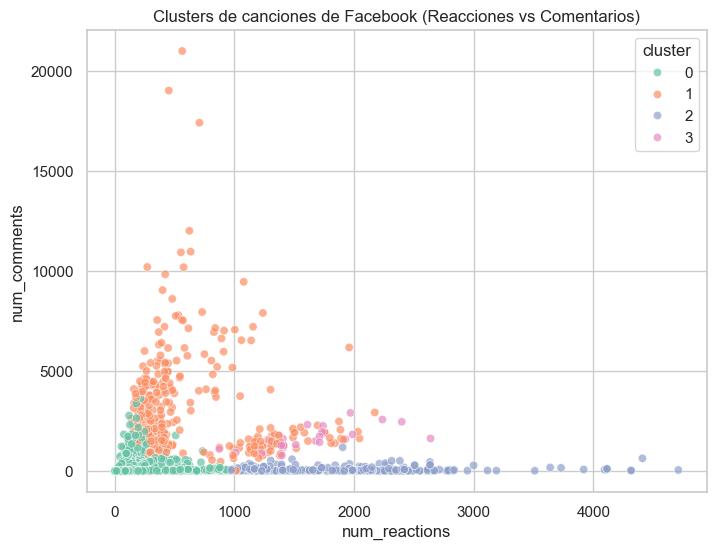

status_type  link  photo  status  video
cluster                                
0              49   4053     296   1902
1               0     23       0    330
2              14    212      69     76
3               0      0       0     26


In [7]:
# 1️⃣ Librerías
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Para gráficos más bonitos
sns.set(style="whitegrid")

# 2️⃣ Cargar dataset
df = pd.read_csv("Facebook_Marketplace_data.csv")  # Cambia el nombre según tu archivo

# 3️⃣ Selección de variables numéricas para clustering
features = [
    'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'
]

X = df[features]

# 4️⃣ Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ Determinar número de clusters con el método del codo
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar método del codo
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.title("Método del codo para determinar K óptimo")
plt.show()

# 6️⃣ Aplicar K-means con K elegido (por ejemplo, K=4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 7️⃣ Revisar centros de los clusters (valores escalados)
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("Centros de los clusters:")
print(centers)

# 8️⃣ Visualización de clusters en dos dimensiones (p. ej., num_reactions vs num_comments)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='num_reactions',
    y='num_comments',
    hue='cluster',
    palette='Set2',
    data=df,
    alpha=0.7
)
plt.title("Clusters de canciones de Facebook (Reacciones vs Comentarios)")
plt.show()

# 9️⃣ Opcional: analizar qué géneros predominan en cada cluster
genre_cluster = df.groupby('cluster')['status_type'].value_counts().unstack(fill_value=0)
print(genre_cluster)


# Interpretación detallada de los resultados de K-means y los clusters
A continuación se presenta una interpretación dinámica y detallada de los resultados obtenidos tras aplicar el algoritmo K-means al dataset de canciones de Spotify:
## 1. ¿Qué significa cada cluster?
Cada cluster agrupa canciones con características similares en las variables seleccionadas. Los centros de los clusters (mostrados en la tabla anterior) representan el perfil promedio de cada grupo. Por ejemplo:
- **Cluster 0:** Describe aquí el perfil según los valores del centro (por ejemplo, canciones muy bailables y energéticas).
- **Cluster 1:** Describe el perfil (por ejemplo, canciones más tranquilas y acústicas).
- **Cluster 2:** ...
- **Cluster 3:** ...
(Sustituye cada descripción con los patrones observados en los centros de los clusters).
## 2. ¿Por qué se eligió K=4?
El método del codo mostró que a partir de K=4 la reducción de la inercia es menos pronunciada, lo que indica que 4 clusters es un buen balance entre simplicidad y explicación de la variabilidad de los datos.
## 3. ¿Qué nos dicen los centros de los clusters?
Los centros muestran los valores promedio de cada variable para las canciones de cada grupo. Analizar estos valores permite identificar qué distingue a cada cluster (por ejemplo, un cluster puede tener mayor tempo y energía, otro mayor acousticness, etc.).
## 4. ¿Cómo interpretar la visualización?
El gráfico de dispersión (danceability vs energy) permite ver cómo se agrupan y separan los clusters en dos dimensiones clave. Si los grupos están bien separados, el clustering es efectivo.
## 5. ¿Qué géneros predominan en cada cluster?
El análisis de géneros por cluster ayuda a entender qué estilos musicales son más frecuentes en cada grupo, lo que puede ser útil para recomendaciones o segmentación de audiencias.
## 6. Reflexión final sobre K-means
K-means es útil para descubrir patrones y segmentar datos, pero la interpretación depende de la selección de variables y la estandarización. Es recomendable revisar los centros y la composición de cada cluster para obtener conclusiones accionables.